## Complete tasks, using Matplotlib

$$
\begin{cases}
4.2x_1 + 10x_2 = 136 \\
-10.1x_1 + 13.8x_2 = 132 \\
18.3x_1 - 7.6x_2 = 108
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
equations = ['$4.2x_1 + 10x_2 = 136$', '$-10.1x_1 + 13.8x_2 = 132$', '$18.3x_1 - 7.6x_2 = 108$']

x_1 = np.linspace(-20, 20, 1000)

f = [(136 - 4.2 * x_1)/10, (132 + 10.1 * x_1)/13.8, (-108 + 18.3 * x_1)/7.6]

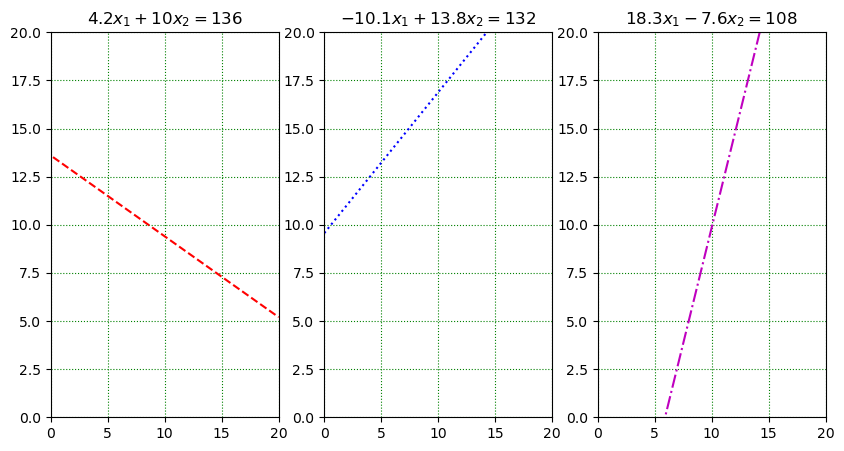

In [3]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 5))

for i, ax_ in enumerate(axes):
    ax_.set(xlim=(0, 20), ylim=(0, 20), title=equations[i])
    ax_.grid(linestyle=':', color='green')

axes[0].plot(x_1, f[0], '--r')
axes[1].plot(x_1, f[1], ':b')
axes[2].plot(x_1, f[2], '-.m')

dir_separate = 'outputs/separate/'
plt.savefig(dir_separate + 'equations.png')
plt.savefig(dir_separate + 'equations.jpg')
plt.savefig(dir_separate + 'equations.svg')

plt.show()

In [4]:
matrices = [
    np.array([[4.2, 10],[-10.1, 13.8]]),
    np.array([[-10.1, 13.8],[18.3, -7.6]]),
    np.array([[4.2, 10],[18.3, -7.6]])
]
rhs = [
    np.array([136, 132]),
    np.array([132, 108]),
    np.array([136, 108])
]

solutions = [np.linalg.solve(matrices[i], rhs[i]) for i in range(len(matrices))]

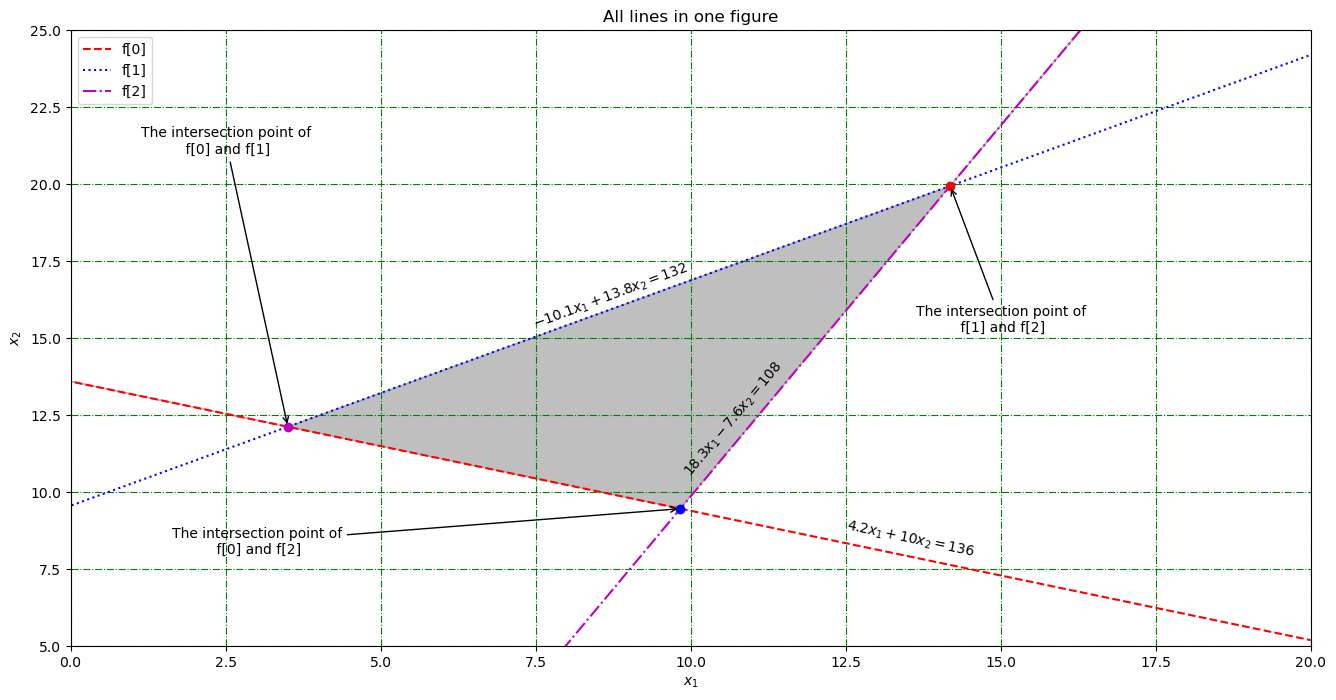

In [5]:
fig = plt.figure(figsize=(16, 8), dpi=100)
ax = plt.axes()
fig.add_axes(ax)
ax.set(xlim=(0, 20), ylim=(5, 25), xlabel='$x_1$', ylabel='$x_2$', title='All lines in one figure')
ax.grid(linestyle='-.', color='green')

ax.plot(x_1, f[0], '--r', label='f[0]')
ax.plot(x_1, f[1], ':b', label='f[1]')
ax.plot(x_1, f[2], '-.m', label='f[2]')

locations = [
    (12.5, 8.8),
    (7.5, 15.3),
    (10, 10.5)
]

ax.text(*locations[0], equations[0], rotation=-23, rotation_mode = 'anchor', transform_rotates_text = True)
ax.text(*locations[1], equations[1], rotation=37, rotation_mode = 'anchor', transform_rotates_text = True)
ax.text(*locations[2], equations[2], rotation=67.5, rotation_mode = 'anchor', transform_rotates_text = True)

ax.plot(*solutions[0], marker='o', color='m')
ax.plot(*solutions[1], marker='o', color='r')
ax.plot(*solutions[2], marker='o', color='b')

y = np.maximum(f[0], f[2])
y_1 = np.maximum(f[1], y)
plt.fill_between(x_1, y, y_1, color='grey', alpha=0.5)

ax.annotate(f"The intersection point of\n f[0] and f[1]", ha="center", xy=solutions[0], xytext=(2.5, 21), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[1] and f[2]", ha="center", xy=solutions[1], xytext=(15, 15.2), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[0] and f[2]", ha="center", xy=solutions[2], xytext=(3, 8), arrowprops=dict(arrowstyle="->"))

ax.legend()

dir_together = 'outputs/together/'
plt.savefig(dir_together + 'equations.png')
plt.savefig(dir_together + 'equations.jpg')
plt.savefig(dir_together + 'equations.svg')

plt.show()